<a href="https://colab.research.google.com/github/VijayanagaramRahul/Data-Science/blob/main/Outliers-Detection-Removal-Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Detection and Removel Method 1: Using Percentile

In [ ]:
import pandas as pd
df=pd.read_csv('Human_Height.csv')
df.head(7)

,Name,Height
0,Rahul,4.8
1,Sandeep,5.8
2,Rowdy,16.4
3,b6,5.8
4,Rishi,4.0
5,Nettam,2.0
6,Prasanth,4.0


In [ ]:
max_height= df['Height'].quantile(0.75)
max_height
#Here 79%   of people is below the height of height 9.19

5.8

In [ ]:
df[df['Height']>max_height]

#Hence, The Human who exceed maximum height are outliers 

,Name,Height
2,Rowdy,16.4
8,S Madhu,35.0


In [ ]:
min_height= df['Height'].quantile(0.1)
min_height
#Here, For 1% the percentile is 3.6 it means that minimum height will be 3.6

3.6

In [ ]:
df[df['Height']<min_height]

#Hence, The Human who should not be below the minimum  height are considerded as  outliers 

,Name,Height
5,Nettam,2.0


In [ ]:
df[(df['Height']<max_height)&   (df['Height']>min_height)]
#Here, I am Removing all the Outliers from the dataset

,Name,Height
0,Rahul,4.8
4,Rishi,4.0
6,Prasanth,4.0
7,Bharath,5.0


#Outlier Detection and Removel Method 2: Using IQR

In [ ]:
df.describe()

,Height
count,9.000000
mean,9.200000
std,10.509044
min,2.000000
25%,4.000000
50%,5.000000
75%,5.800000
max,35.000000


In [ ]:
Q1=df.Height.quantile(0.25)
Q3=df.Height.quantile(0.75)
IQR=Q3-Q1
Q1,Q3, IQR

(4.0, 5.8, 1.7999999999999998)

In [ ]:
#Upper & Lower Limits

lower_limit=Q1 - 1.5 * IQR
upper_limit=Q3 + 1.5 * IQR

lower_limit,upper_limit

(1.3000000000000003, 8.5)

In [ ]:
df[(df['Height']<upper_limit)&   (df['Height']>lower_limit)]

,Name,Height
0,Rahul,4.8
1,Sandeep,5.8
3,b6,5.8
4,Rishi,4.0
5,Nettam,2.0
6,Prasanth,4.0
7,Bharath,5.0


#Outlier Detection and Removel Method 3: Using  Standard Deviation

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

df=pd.read_csv('Heights.csv')
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


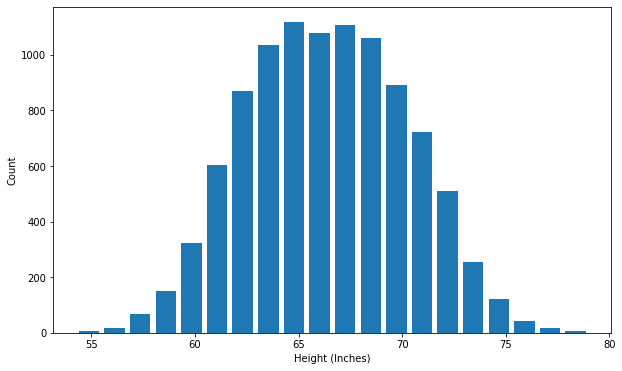

In [ ]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")
plt.show()

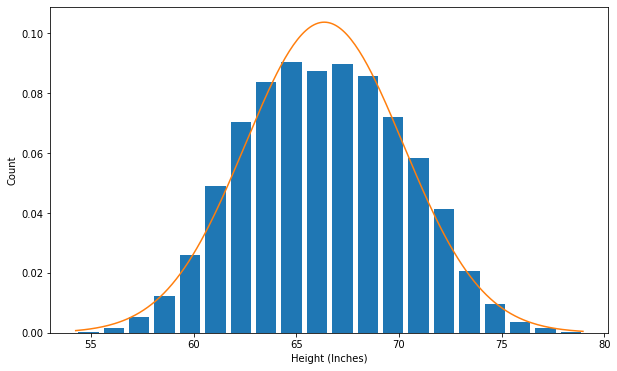

In [ ]:
from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")
rangee=np.arange(df.Height.min(), df.Height.max(),0.1)
plt.plot(rangee,norm.pdf(rangee, df.Height.mean(), df.Height.std()))

Read this Article Regarding Normal Distribution and deviations.....
https://mathsisfun.com/data/standard-normal-distribution.html

In [ ]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
upper_limit=df.Height.mean() + 3 * df.Height.std() # 3 standard deviation 
upper_limit # It's Seems that the heigh more than 66 will be considerd as an outlier

77.91014411725232

In [ ]:
lower_limit=df.Height.mean() - 3 * df.Height.std() # 3 standard deviation 
lower_limit # It's Seems that the heigh less than 55 will be considerd as an outlier

54.824975392478876

In [ ]:
dataset_without_outlier= df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]
dataset_without_outlier.shape

(9993, 2)

#Outlier Detection and Removel Method 4: Using Z Score  

It is also same thing that we did in the method 3 

In [ ]:
df['zscore']=(df.Height - df.Height.mean() ) / df.Height.std()
df.sample(2)

,Gender,Height,zscore
4586,Male,69.088865,0.707287
587,Male,70.572002,1.092764


In [ ]:
df[(df['zscore'] <-3  ) | ( df['zscore'] >3 ) ]  
#Hence zscore less than 3 and more than 3 are outliers since we are using 3 standard deviation

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
dataset_without_outlier= df[(df['zscore']>-3) & (df['zscore']<3)]
dataset_without_outlier.shape

(9993, 3)